# Detectar Output audio del pc, para así detectar el audio de una emisora web. Hallar el espectro en tiempo real.

## Ideas:
- Usar Virtual audio cable para redireccionar el output audio de la computadora como input(mic) 

In [24]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.io.wavfile import write
from scipy.signal import welch
from matplotlib.mlab import psd
import os

In [25]:
dispositivos_entrada = [d for d in sd.query_devices() if d['max_input_channels'] > 0]

for i, dispositivo in enumerate(dispositivos_entrada):
    print(f"Índice: {i}, Nombre: {dispositivo['name']}, Canales: {dispositivo['max_input_channels']}")

Índice: 0, Nombre: Asignador de sonido Microsoft - Input, Canales: 2
Índice: 1, Nombre: Mezcla estéreo (Realtek(R) Audi, Canales: 2
Índice: 2, Nombre: Controlador primario de captura de sonido, Canales: 2
Índice: 3, Nombre: Mezcla estéreo (Realtek(R) Audio), Canales: 2
Índice: 4, Nombre: Mezcla estéreo (Realtek(R) Audio), Canales: 2
Índice: 5, Nombre: Altavoz de PC (Realtek HD Audio 2nd output with HAP), Canales: 2
Índice: 6, Nombre: Altavoz de PC (Realtek HD Audio output with HAP), Canales: 2
Índice: 7, Nombre: Mic in at front panel (black) (Mic in at front panel (black)), Canales: 2
Índice: 8, Nombre: Mezcla estéreo (Realtek HD Audio Stereo input), Canales: 2
Índice: 9, Nombre: Varios micrófonos (Realtek HD Audio Mic input), Canales: 2
Índice: 10, Nombre: CABLE Output (VB-Audio Point), Canales: 8


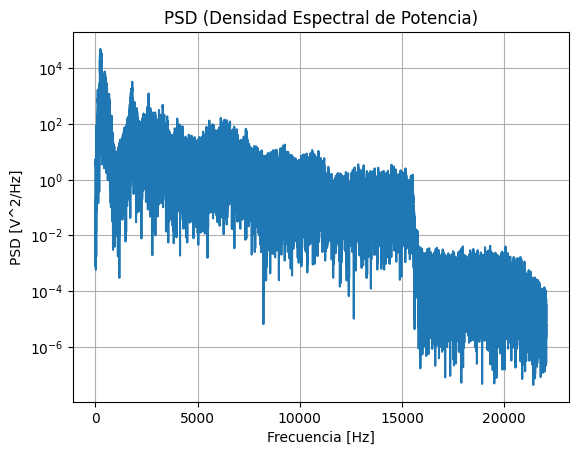

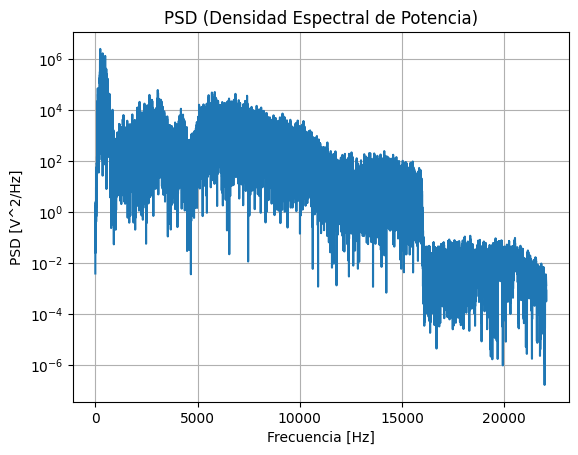

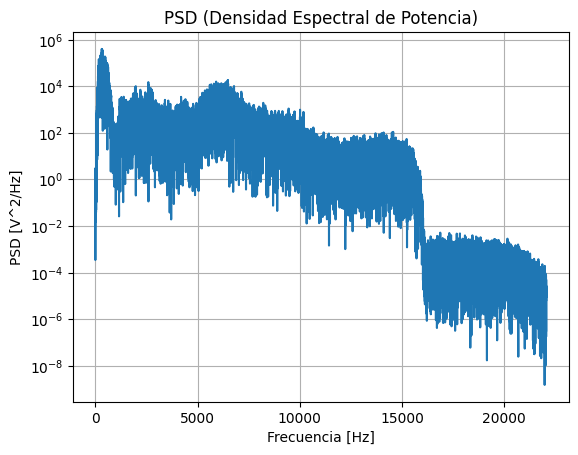

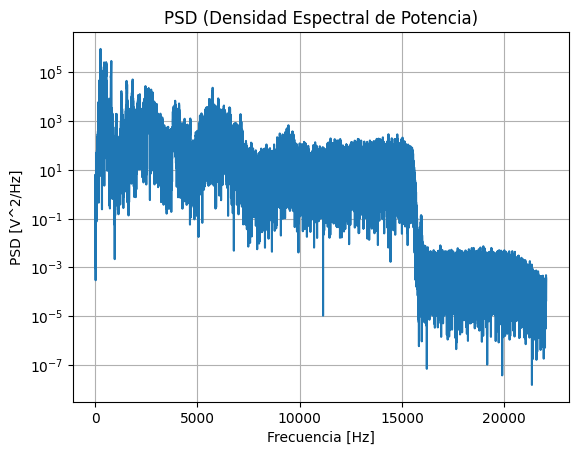

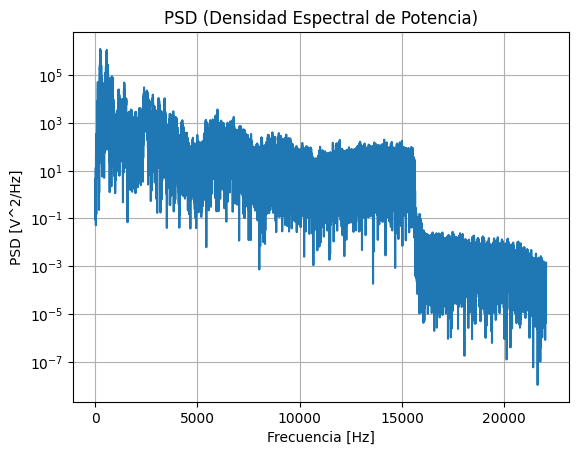

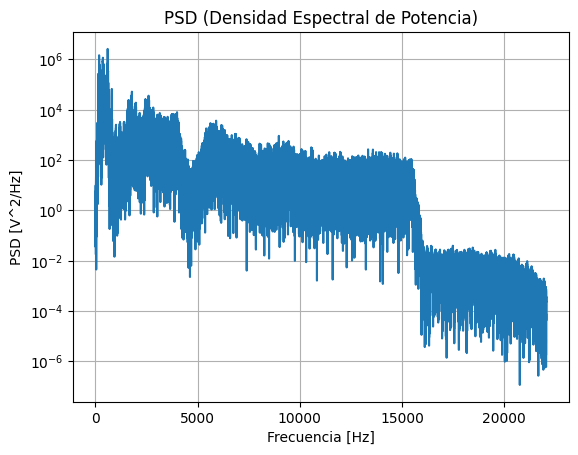

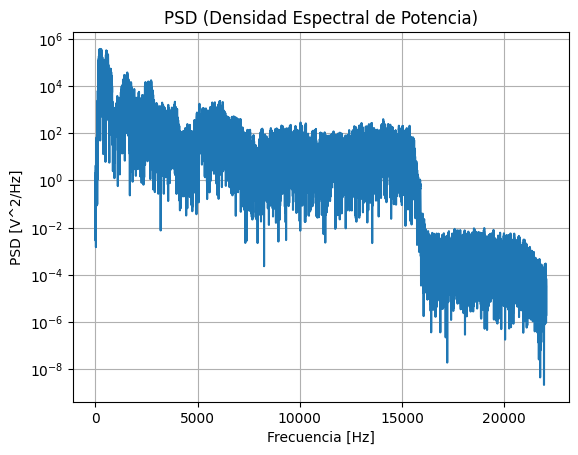

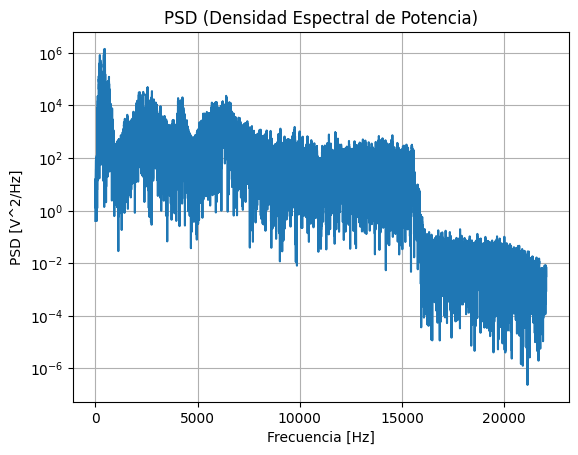

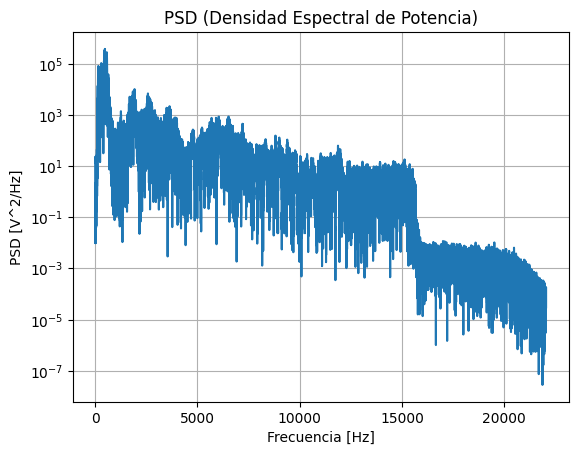

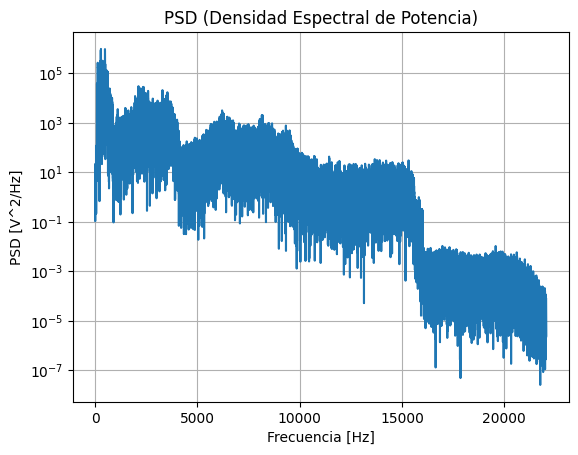

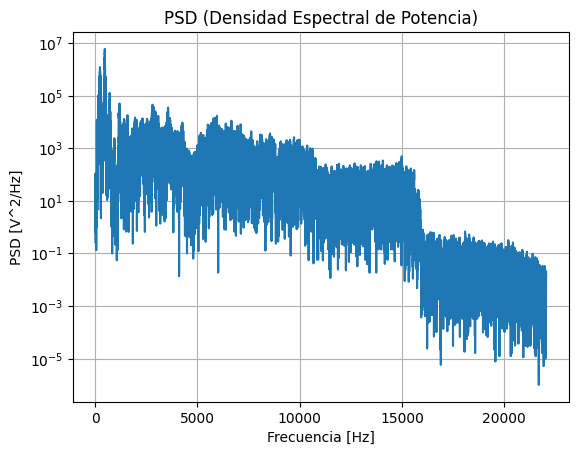

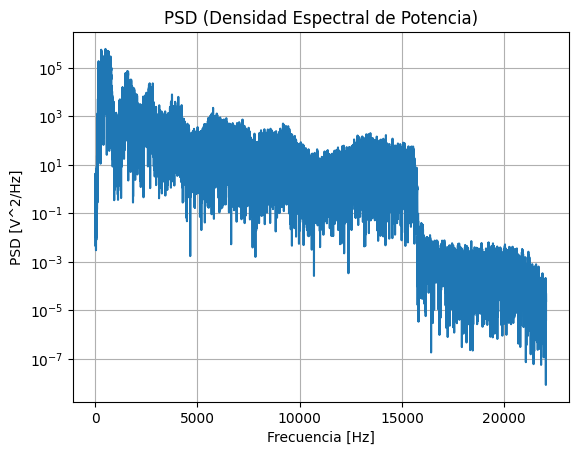

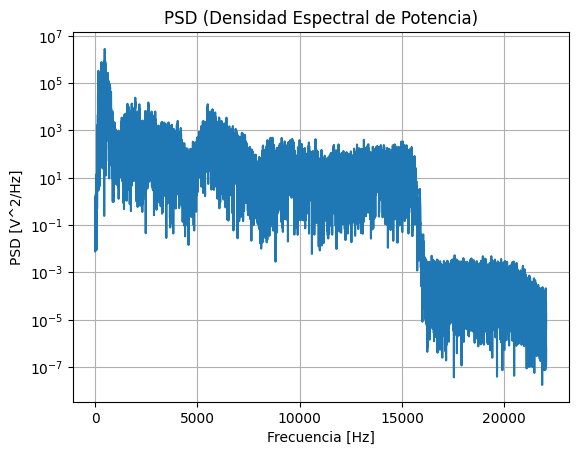

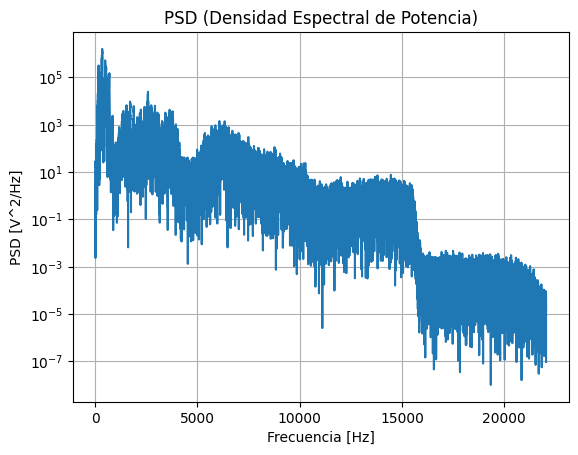

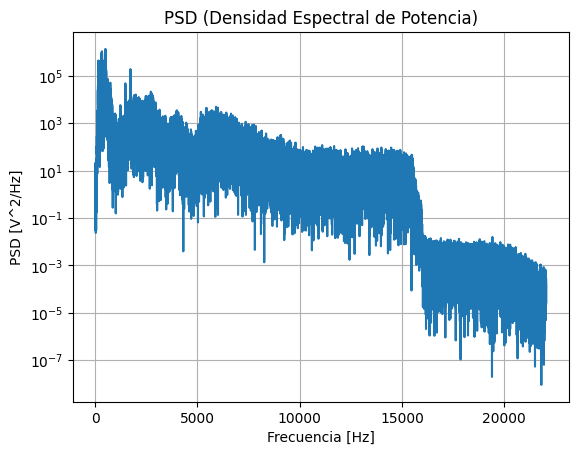

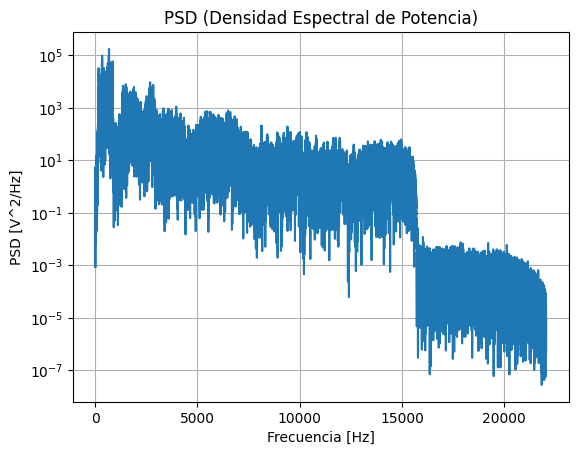

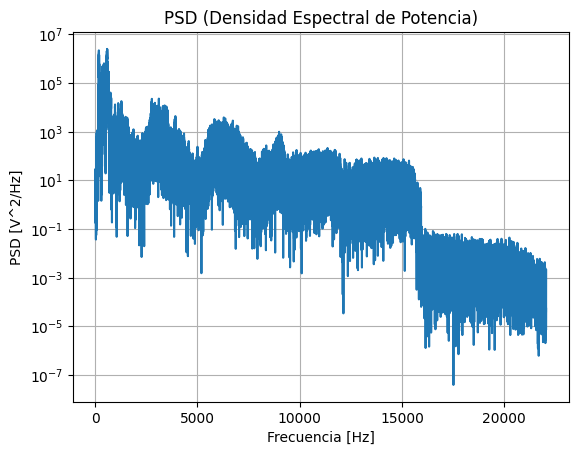

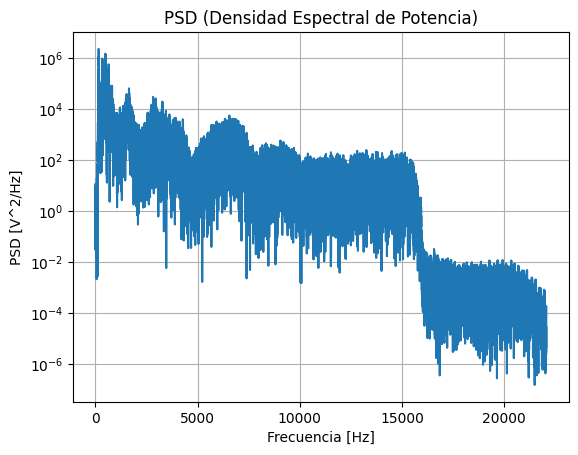

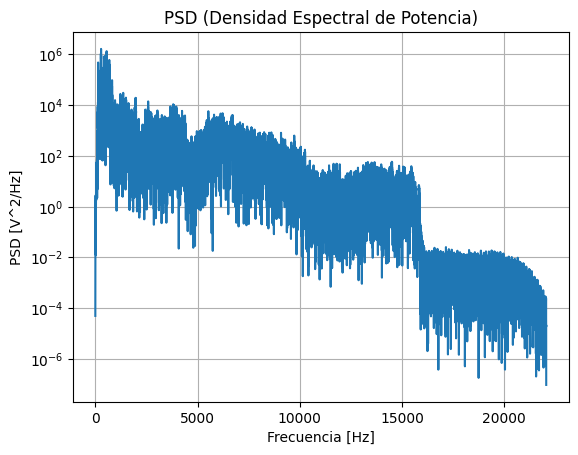

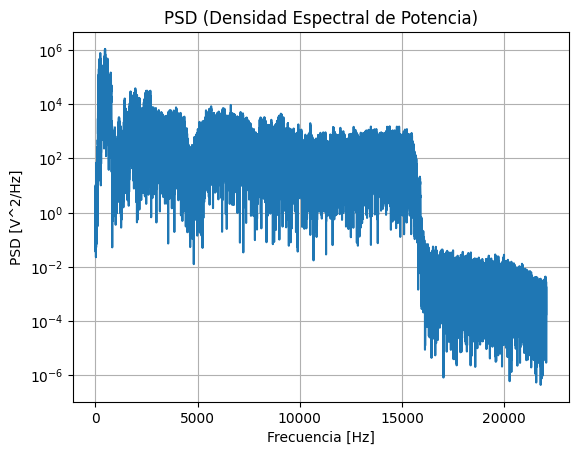

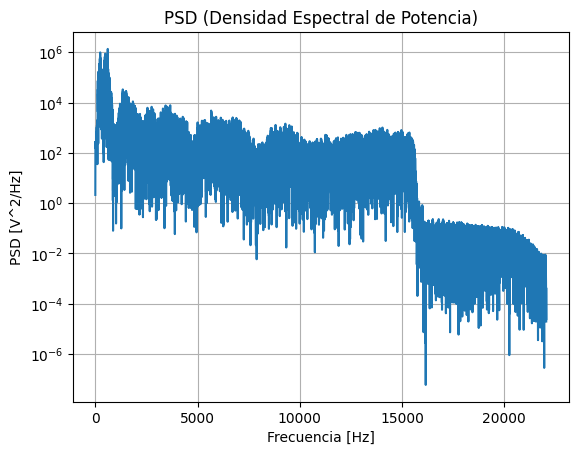

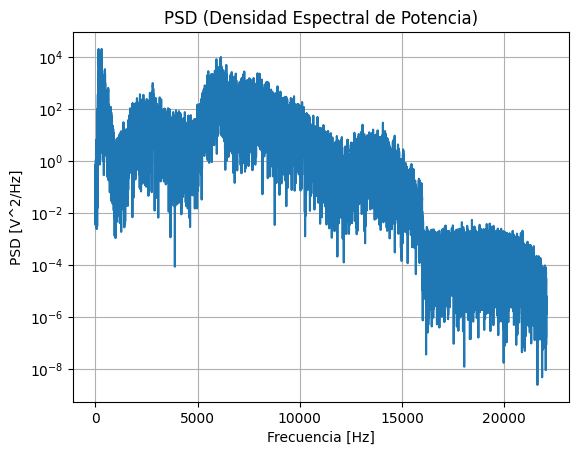

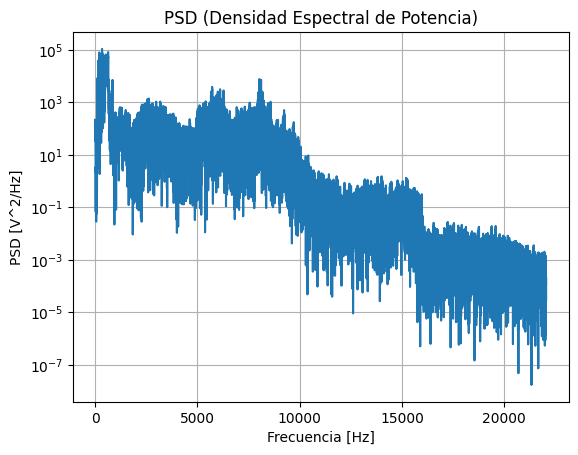

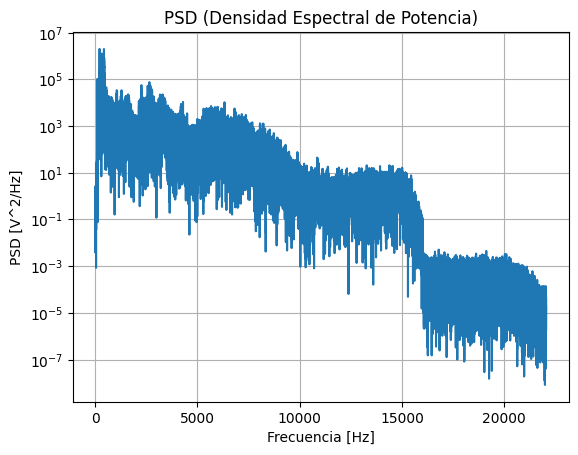

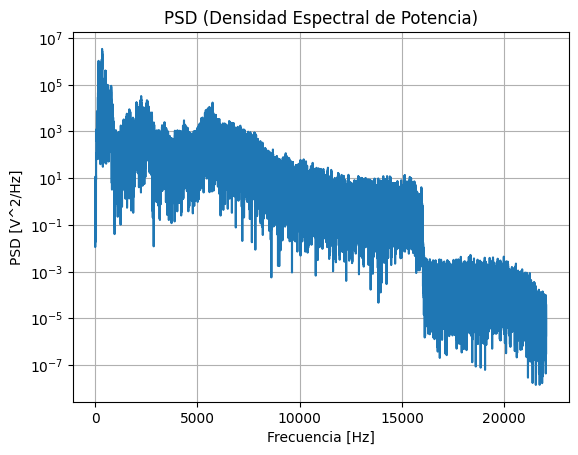

KeyboardInterrupt: 

In [26]:
def grabar_audio(indice_dispositivo, duracion, frecuencia_muestreo):
    sd.default.device = indice_dispositivo
    audio = sd.rec(int(duracion * frecuencia_muestreo), samplerate=frecuencia_muestreo, channels=2, dtype='int16')
    sd.wait()  # Espera a que termine la grabación

    audio_mono = np.mean(audio, axis=1).astype(np.int16)  # Convertir a mono
    return audio_mono

def welch_vector(X, fs, window, nperseg, nfft):
    return welch(X, fs, window=window, nperseg=nperseg, noverlap=(nperseg//2), nfft=nfft)

# Elegir el índice del dispositivo de entrada (cambiar este valor)
indice_dispositivo = 4

# Parámetros de grabación
frecuencia_muestreo = 44100  # Frecuencia de muestreo en Hz
duracion = 2
ruta_archivo = os.path.join('audio', 'sample.wav')

# Bucle infinito para grabar, plotear y borrar el archivo
while True:
    # Grabar audio
    audio = grabar_audio(indice_dispositivo, duracion, frecuencia_muestreo)

    # Guardar el archivo WAV
    write(ruta_archivo, frecuencia_muestreo, audio)

    # Calcular el PSD usando Welch
    f, psd = welch_vector(audio, frecuencia_muestreo, 'blackmanharris', (len(audio)-1), (len(audio)*2)-1)

    # Limpiar el gráfico previo antes de graficar el nuevo
    plt.clf()  # Limpia el gráfico actual

    # Graficar el PSD
    plt.semilogy(f, psd)
    plt.title('PSD (Densidad Espectral de Potencia)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('PSD [V^2/Hz]')
    plt.grid(True)
    plt.show(block=False)  # Mostrar el gráfico sin bloquear el flujo del programa

    # Borrar el archivo WAV después de procesarlo
    os.remove(ruta_archivo)

